In [12]:
import pandas as pd
import matplotlib.pylab as plt
flight=pd.read_csv("C:\\Users\\Factory\\Desktop\\EastWestAirlines.csv")

In [35]:
flight.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,5
1,2,19244,0,1,1,1,215,2,0,0,6968,0,5
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,5
3,4,14776,0,1,1,1,500,1,0,0,6952,0,5
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [32]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
 12  clust              3999 non-null   int64
dtypes: int64(13)
memory usage: 406.3 KB


In [34]:
flight.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
clust                0
dtype: int64

In [29]:
import seaborn as sn

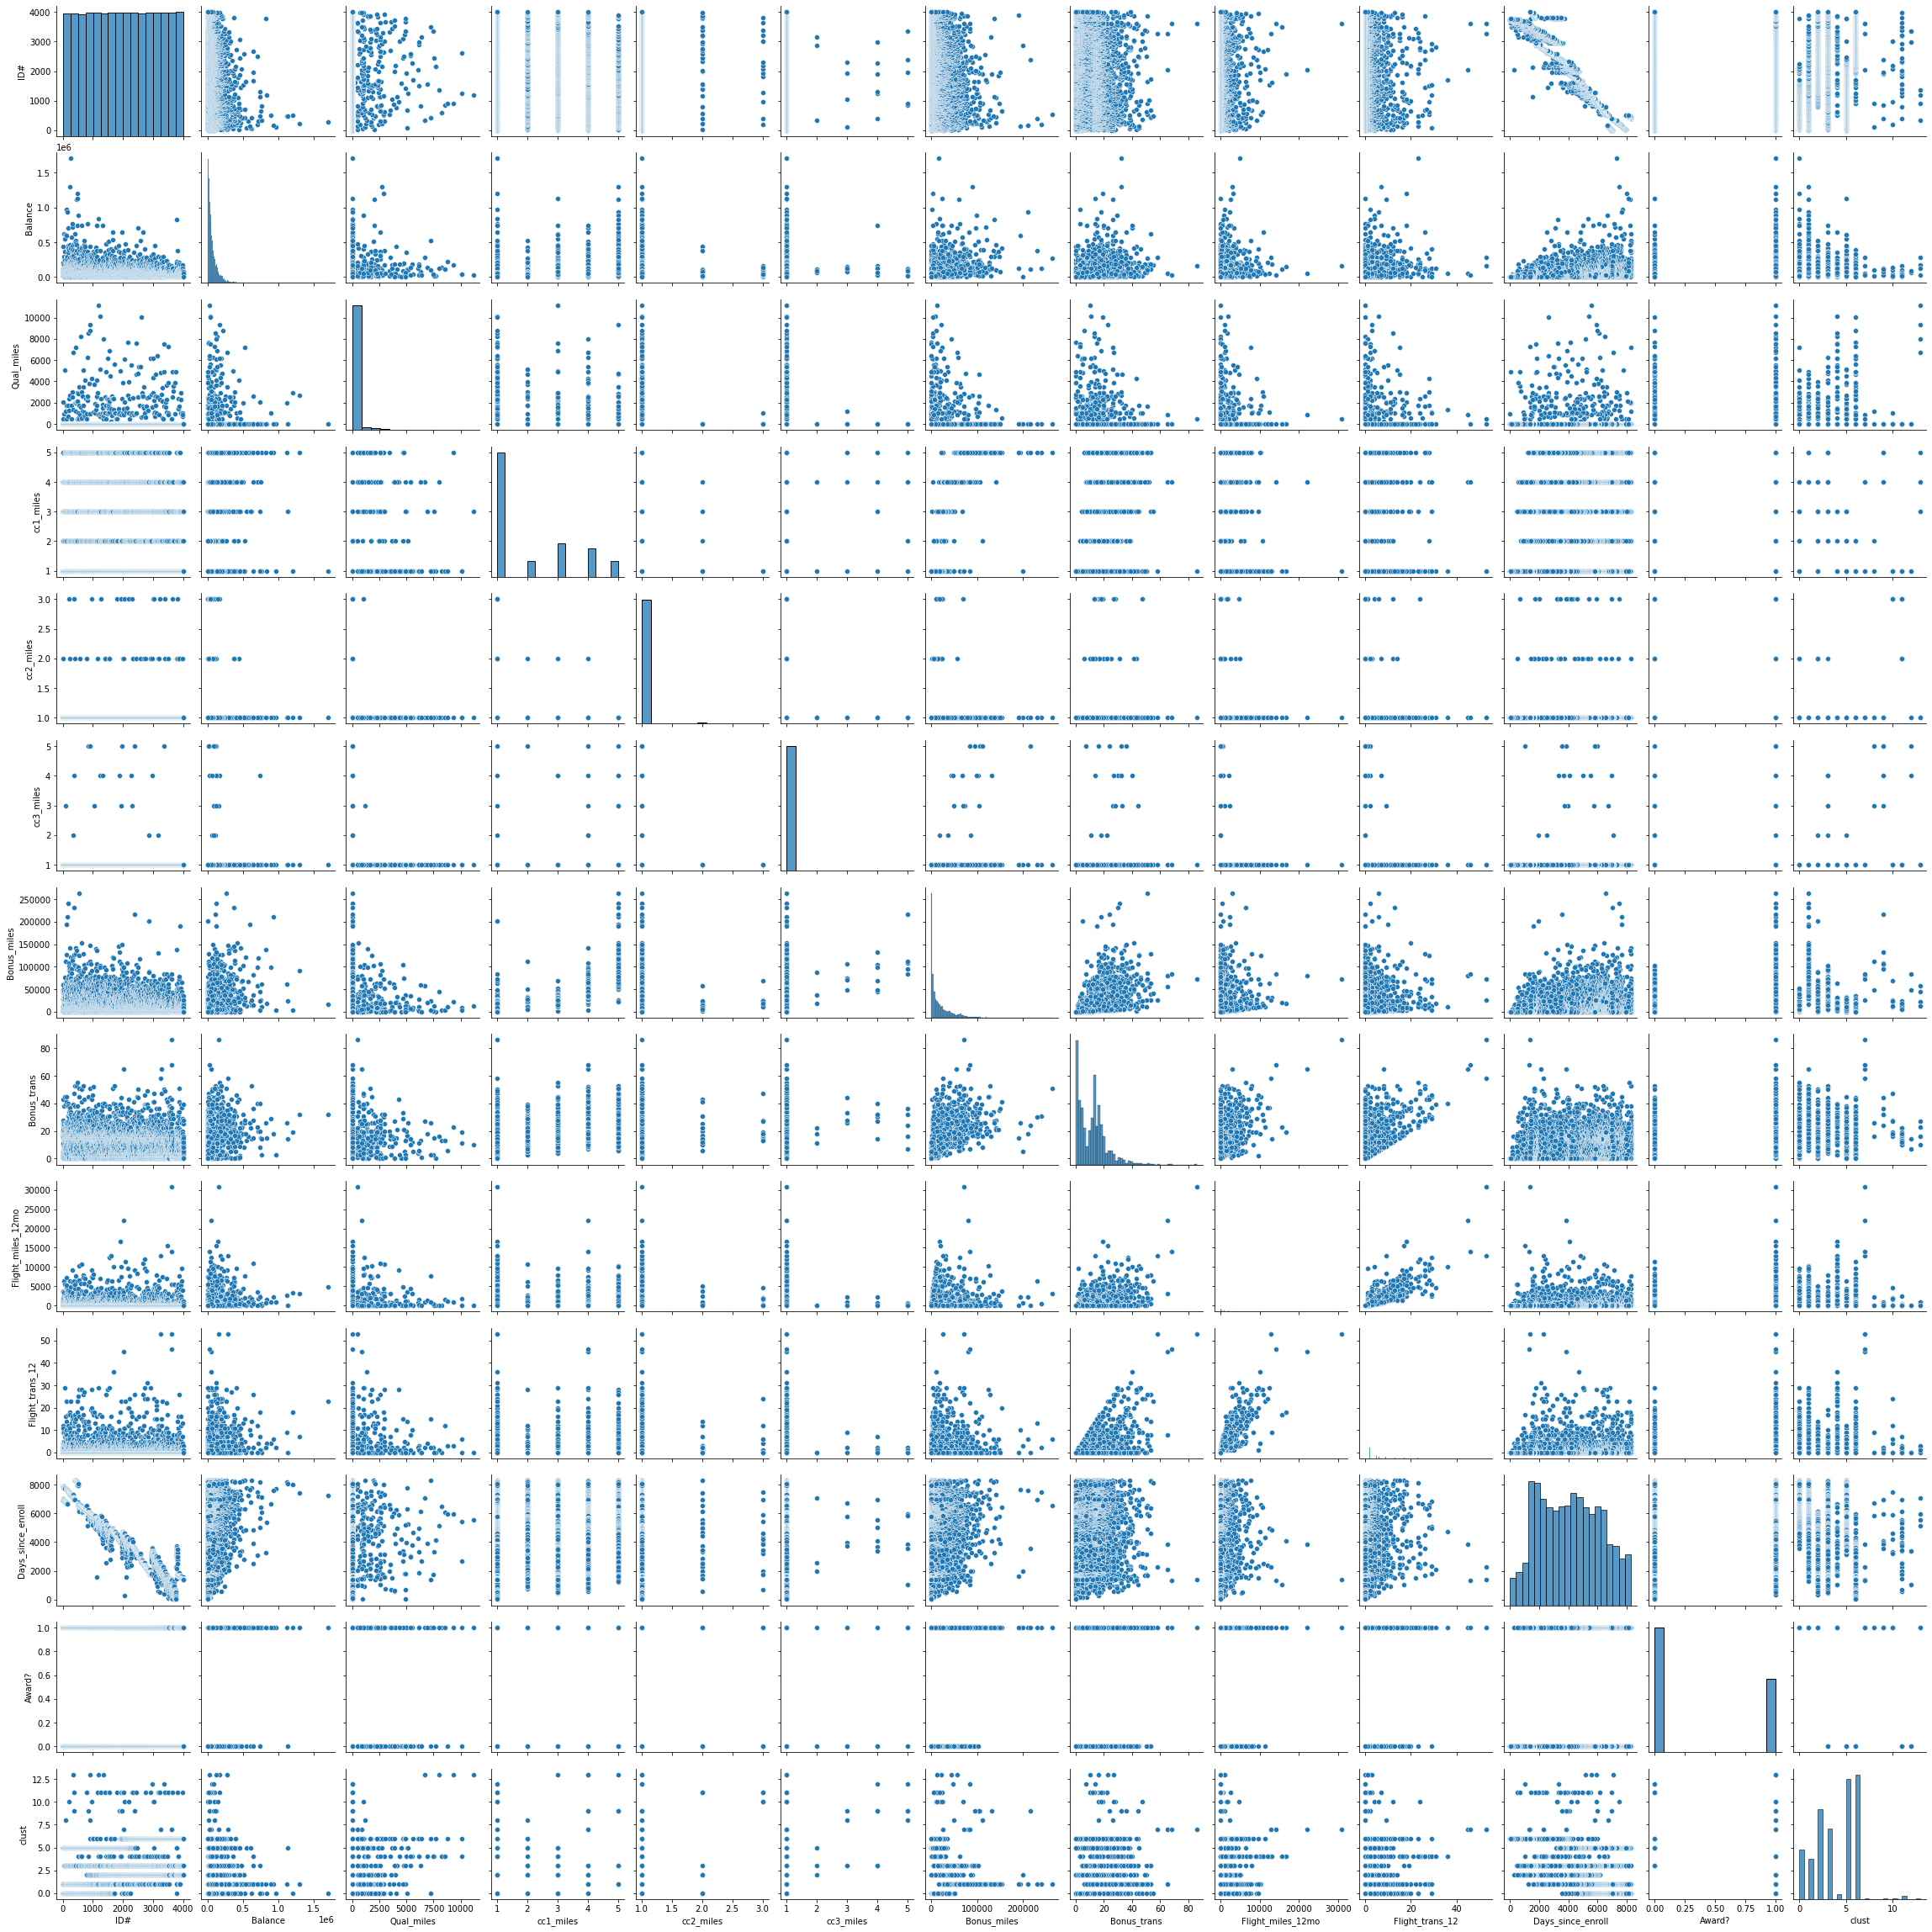

In [30]:
sn.pairplot(flight)
cor_values= flight.corr()

In [36]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [37]:
df_norm= norm_func(flight.iloc[:,1:])
df_norm
df_norm.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.043172,0.012927,0.264879,0.007252,0.003063,0.065020,0.134906,0.014929,0.025917,0.496330,0.370343,0.283379
std,0.059112,0.069399,0.344230,0.073825,0.048810,0.091590,0.111672,0.045436,0.071569,0.248991,0.482957,0.168161
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010868,0.000000,0.000000,0.000000,0.000000,0.004741,0.034884,0.000000,0.000000,0.280685,0.000000,0.153846
50%,0.025279,0.000000,0.000000,0.000000,0.000000,0.027195,0.139535,0.000000,0.000000,0.493610,0.000000,0.307692
75%,0.054201,0.000000,0.500000,0.000000,0.000000,0.090261,0.197674,0.010092,0.018868,0.697914,1.000000,0.461538
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

In [39]:
z=linkage(df_norm,method='complete',metric='euclidean')

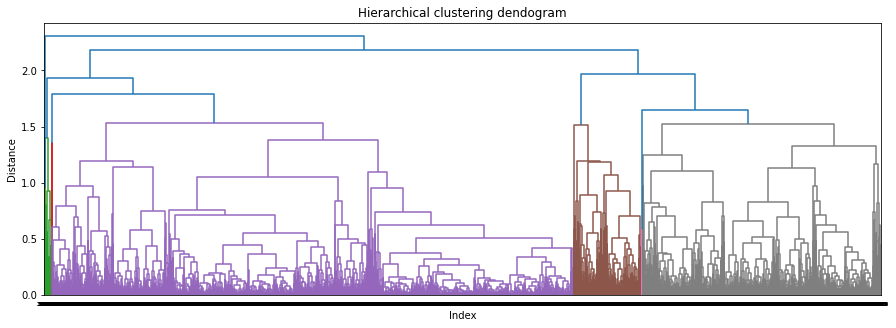

In [31]:
plt.figure(figsize=(15,5));plt.title("Hierarchical clustering dendogram");plt.xlabel("Index");plt.ylabel("Distance")
sch.dendrogram(z,leaf_rotation=0,leaf_font_size=6)
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering
import sklearn.cluster as skc

In [21]:
h_clust=AgglomerativeClustering(n_clusters=14,affinity="euclidean",linkage="complete").fit(df_norm)
h_clust

AgglomerativeClustering(linkage='complete', n_clusters=14)

In [22]:
h=pd.Series(h_clust.labels_)
flight['clust']=h
flight1=flight.iloc[:,[12,0,1,2,3,4,5,6,7,8,9,10,11]]

In [23]:
flight2= flight1.iloc[:,2:].groupby(flight1.clust).median()
flight1.to_csv("flightfinalhc.csv",encoding="utf-8")

In [24]:
flight1

,clust,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,5,1,28143,0,1,1,1,174,1,0,0,7000,0
1,5,2,19244,0,1,1,1,215,2,0,0,6968,0
2,5,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,5,4,14776,0,1,1,1,500,1,0,0,6952,0
4,1,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,2,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,2,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,2,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,6,4020,54899,0,1,1,1,500,1,500,1,1401,0
